In [69]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read in before drug dataframe
before_res = pd.read_csv('/Users/cmdb/Documents/Quant_Bio_Project_Data/TRP_tracking_PAPA/PAPA_0000_0000_trajs.csv')


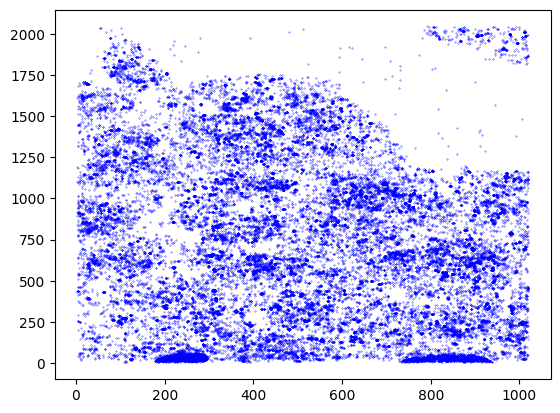

In [70]:
# practice plotting variables from the data frame
import tifffile as tiff
plt.plot(before_res['y'], before_res['x'], '.', color = 'blue', markersize = 0.5)

In [71]:
# group the unique trajectories by the frame they're in

traj_count_per_frame = before_res.groupby('frame')['trajectory'].nunique()

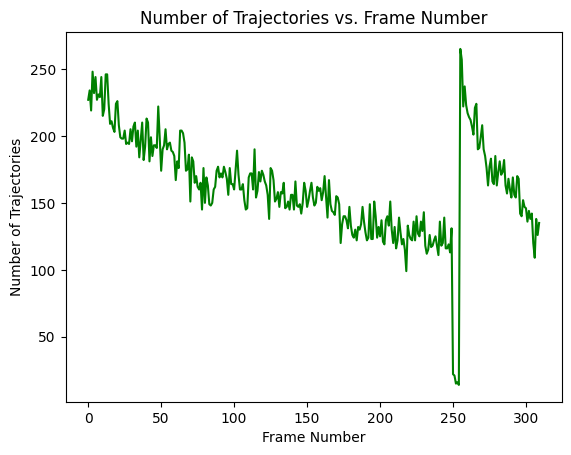

In [72]:
# plot the results

traj_count_per_frame.plot(color = 'green', markersize = 2)
plt.xlabel('Frame Number')
plt.ylabel('Number of Trajectories')
plt.title('Number of Trajectories vs. Frame Number')
plt.show()

In [80]:
# Write a for loop to do the same thing, but iterating over multiple files in a folder.

import glob

# This will create a dictionary called "results" where
# each key is the filename and each value is the counted series for that file.

results = {}

files = glob.glob('TRP_tracking_PAPA/*.csv')

for filename in files:
    df = pd.read_csv(filename)
    trajectory_count_per_frame = df.groupby('frame')['trajectory'].nunique()
    results[filename] = trajectory_count_per_frame

In [ ]:
# The next step in the project would be to write a script that plots the number of trajectories as a
# function of frame number, but normalized to the number of trajectories as a function of frame number 
# with spontaneous reactivation data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

folderA_files = glob.glob('dataA/*.csv')
folderB_files = glob.glob('dataB/*.csv')

# Folder A
traj_counts_A = []
for filename in folderA_files:
    df = pd.read_csv(filename)
    counts = df.groupby('frame')['trajectory'].nunique()
    traj_counts_A.append(counts)
traj_counts_A = pd.concat(traj_counts_A, axis=1).sum(axis=1)

# Folder B
traj_counts_B = []
for filename in folderB_files:
    df = pd.read_csv(filename)
    counts = df.groupby('frame')['trajectory'].nunique()
    traj_counts_B.append(counts)
traj_counts_B = pd.concat(traj_counts_B, axis=1).sum(axis=1)

# Align indexes and normalize
all_frames = traj_counts_A.index.union(traj_counts_B.index)
traj_counts_A = traj_counts_A.reindex(all_frames, fill_value=0)
traj_counts_B = traj_counts_B.reindex(all_frames, fill_value=0)
traj_counts_B_safe = traj_counts_B.replace(0, np.nan)

normalized_counts = traj_counts_A / traj_counts_B_safe

normalized_counts.plot()
plt.xlabel('Frame Number')
plt.ylabel('Normalized Number of Trajectories\n(Folder A / Folder B)')
plt.title('Normalized Number of Trajectories per Frame')
plt.tight_layout()
plt.show()

ValueError: No objects to concatenate

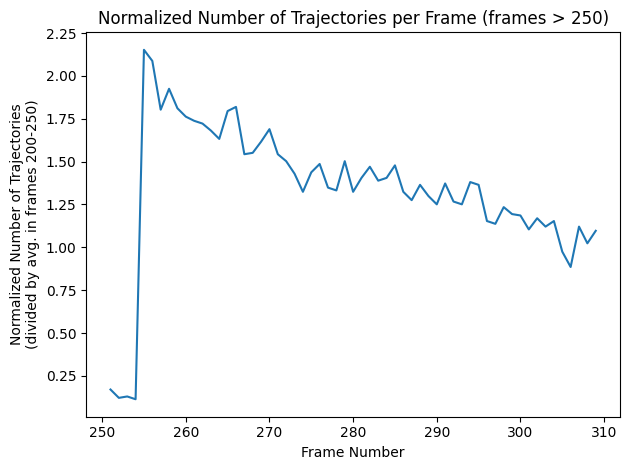

In [ ]:
# If we didn't have a second file that specifically contains the spontaneous reactivation data, we could
# just normalize against the trajectories per frame before the PAPA pulse (in this case, the pulse is 
# around frame 250). So, we would normalize frames 250-300 to frames 200-250.

import pandas as pd
import matplotlib.pyplot as plt

# Group by frame and count unique trajectories
traj_counts = before_res.groupby('frame')['trajectory'].nunique()

# Select the normalization range
frame_range = range(200, 251)  # includes 250

# Compute the average in this range
norm_value = traj_counts.loc[frame_range].mean()

# Normalize all trajectory counts
normalized_counts = traj_counts / norm_value

# Select only frames AFTER 250
plot_counts = normalized_counts[normalized_counts.index > 250]

# Plot
plot_counts.plot()
plt.xlabel('Frame Number')
plt.ylabel('Normalized Number of Trajectories\n(divided by avg. in frames 200-250)')
plt.title('Normalized Number of Trajectories per Frame (frames > 250)')
plt.tight_layout()
plt.show()